# TP2 La classification par K-NN et la frontière de décision


### Table of Contents

* [0. Échauffement](#chapter0)
* [1. La classification par K-NN pour `Iris`](#chapter1)
    * [1.1 Préparer les données](#section_1_1)
    * [1.2 Écrire un classifieur K-NN](#section_1_2)
    * [1.3 K-NN de `sklearn`](#section_1_3)
* [2. ($\star$) La frontière de décision pour K-NN](#chapter2)
    

## 0. Échauffement <a class="anchor" id="chapter0"></a>

Le tableau ci-dessous est un ensemble de données d’apprentissage contenant six observations, trois covariables (features) et une variable dépendante (label).


| Observations | $X^1$ | $X^2$ |$X^3$ |$Y$ |
| :-- | :-- | :-- | :-- | :-- |
| 0 | 0 | 3 | 0 | Rouge |
| 1 | 2 | 0 | 0| Rouge |
| 2 | 0 | 1 | 3 | Rouge |
| 3 | 0 | 1 | 2 | Vert |
| 4 | -1 | 0 | 1 | Vert |
| 5 | 1 | 1 | 1 | Rouge |

Nous souhaitions utiliser cet ensemble de données pour faire la prédiction d'une nouvelle entrée $x = (x1, x2, x3) = (0, 0, 0)$ en utilisant la méthode des $K$ plus proches voisins.

**Exercice 1** : Répondre aux questions suivantes. (Vous pouvez calculer à la main ou par programmation)

(1) Calculer la distance euclidienne entre chaque observation et le point à prédire $x = (x1, x2, x3) = (0, 0, 0)$.

(2) Quelle est la prédiction avec $K=1$ ?

(2) Quelle est la prédiction avec $K=3$ ?

**Réponse pour l'exercice 1**






## 1. La classification par K-NN pour `Iris`  <a class="anchor" id="chapter1"></a>

In [14]:
import numpy as np

Dans ce TP, on va utiliser un ensemble de données classique `Iris` inclus dans `sklearn`. 

Cet ensemble de données se compose de 3 types différents d'Iris (Setosa, Versicolor et Virginica). Les features sont *la longueur des sépales*, *la largeur des sépales*, *la longueur des pétales* et *la largeur des pétales*.

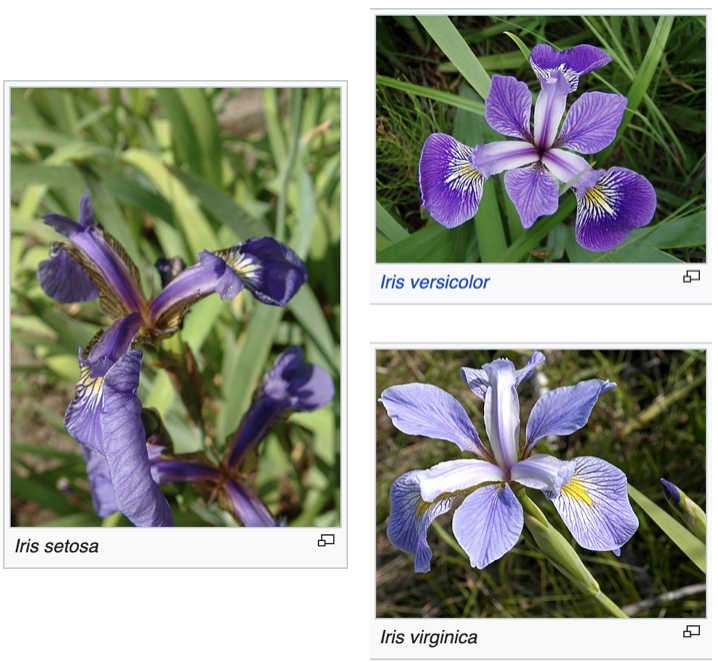

- L'image des Iris vient de https://fr.wikipedia.org/wiki/Iris_de_Fisher 

Pour plus d'information sur cet ensemble de données, voir

- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

- https://fr.wikipedia.org/wiki/Iris_de_Fisher

### 1.1 Préparer les données <a class="anchor" id="section_1_1"></a>


Première étape : on va importer cet ensemble de données et on note les features (covariables) par `X` et les labels (étiquettes) par `y`.


In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X=iris.data
y=iris.target


**Exercice 2** : Quelles sont les dimensions de `X` et de `y` ? Combien de données a-t-on dans cet ensemble `Iris`?

In [5]:
# Réponse pour l'exercice 2

print(X.shape)
print(y.shape)

(150, 4)
(150,)


Maintenant on va découper `X` et `Y` en deux parties : training set (l'ensemble d'entraînement) et test set (l'ensemble de test) en utilisant `train_test_split`. 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Exercice 3** : À quoi servent les paramètres  `test_size=0.33` et  `random_state=42` ? Quelles sont les dimensions de `X_train`,`X_test`, `y_train` et `y_test`?

- Indication : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

**Réponse pour l'exercice 3 :**








In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 4)
(50, 4)
(100,)
(50,)


### 1.2 Écrire un classifieur K-NN <a class="anchor" id="section_1_2"></a>

On va d'abord écrire un classifieur K-NN manuellement avant d'utiliser le package `KNeighborsClassifier` dans `sklearn`.

**Exercice 4** : Écrire une fonction pour calculer la distance euclidienne entre `sample1` et `sample2`$\in \mathbb{R}^d$. 

In [32]:
# Réponse pour l'exercice 4

def euc_dis(sample1,sample2):
    assert sample1.shape == sample2.shape
    assert sample1.ndim == 1
    assert sample2.ndim == 1
    
    dist = 0
    for i in range(0, sample1.shape[0]):
        dist += (sample1[i]-sample2[i])**2
    dist = np.sqrt(dist)
        
    return dist   

**Exercice 5** : Écrire une fonction de classification $K$-NN pour prédire une nouvelle entrée `X_new` en fonction des données d'entraînement et de la valeur de `K`. 

Indication: 

- Étape 1 : Calculer la distance de `X_new` avec toutes les données dans `X_train` en utilisant la fonction `euc_dis` de l'exo 4.

- Étape 2 : Trouver les K voisins les plus proches en utilisant `np.argsort`.
    - Réf : https://numpy.org/doc/stable/reference/generated/numpy.argsort.html . 
    - Un exemple de Counter.most_common() se trouve dans la prochaine cellule. 

- Étape 3 : constater quelle étiquette se répète le plus  et `return` cette étiquette comme une prédiction. Pour cette étape, on pourra utiliser le package `collections - Counter - most_common()` 
    - Réf : https://docs.python.org/fr/3/library/collections.html . 
    - Un exemple de Counter.most_common() se trouve dans la prochaine cellule. 

In [19]:
# Un exemple de np.argsort 

distance_ex=np.array([4,4,4,3,3,3,2,2,2,1,1,0.5,0.2])
print ("Les indices où se trouvent les 4 plus petits chiffres sont", np.argsort(distance_ex)[:4])
print ("Les 4 plus petits chiffres sont", distance_ex[np.argsort(distance_ex)[:4]])

print ("\n")

# Un exemple de counter.most_common()

from collections import Counter 

print ("Dans 'aabbbbccccccc', les fréquences des lettres sont", Counter('aabbbbccccccc').most_common())
print ("Dans 'aabbbbccccccc', la lettre qui se répète le plus est", Counter('aabbbbccccccc').most_common()[0][0])


Les indices où se trouvent les 4 plus petits chiffres sont [12 11  9 10]
Les 4 plus petits chiffres sont [0.2 0.5 1.  1. ]


Dans 'aabbbbccccccc', les fréquences des lettres sont [('c', 7), ('b', 4), ('a', 2)]
Dans 'aabbbbccccccc', la lettre qui se répète le plus est c


In [53]:
# Réponse pour l'exercice 5

from collections import Counter 

def knn_classifieur(X_train, y_train, X_new, K): 
    size = X_train.shape[0]
    dis = np.empty(size)
    for i in range(0, size):
        dis[i] = euc_dis(X_train[i], X_new)
    KNN_arg = np.argsort(dis)[:K]
    #KNN = X_train[KNN_arg]
    KNN_val = y_train[KNN_arg]
    
    val = Counter(KNN_val).most_common()[0][0]
    return val
    

**Exercice 6** : Faire la prédiction pour l'ensemble `X_test` en utilisant `knn_classifieur` défini dans l'exercice 5 pour K=3. Calculer le taux de précision (appelé "accuracy score" en anglais), i.e. le pourcentage d'étiquettes bien classées,  de `knn_classifieur` sur `X_test`.

In [94]:
# Réponse pour l'exercice 6

predictions = [knn_classifieur(X_train, y_train, data, 3) for data in X_test]

count = 0
for i in range(0, y_test.shape[0]):
    if predictions[i] == y_test[i]:
        count += 1

precision = count/y_test.shape[0]*100
print ("Le taux de précision de notre knn_classifieur est : ", precision, "%", sep = '')

Le taux de précision de notre knn_classifieur est : 98.0%


### 1.3  K-NN de `sklearn` <a class="anchor" id="section_1_3"></a>


Maintenant on va utiliser le package `KNeighborsClassifier` dans `sklearn` afin de faire la classification. 

- Réf : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

On va créer un modèle K-NN pour K=3.

In [117]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifieur_2 = KNeighborsClassifier(n_neighbors=3)

**Exercice 7** : Entraîner le modèle `knn_classifieur_2` avec `X_train` et `y_train`. 

In [118]:
# Réponse pour l'exercice 7
knn_classifieur_2.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

**Exercice 8** : Calculer le taux de précision (accuracy score) de `knn_classifieur_2` sur l'ensemble `X_test`.

In [119]:
# Réponse pour l'exercice 8
knn_classifieur_2.score(X_test, y_test)


0.98

## 2. ($\star$) La frontière de décision pour K-NN <a class="anchor" id="chapter2"></a>

Dans cette partie, on va étudier la frontière de décision (Decision boundary) pour le modèle K-NN dans le cadre de la classification binaire. 


**Exercice 9** : Qu'est-ce que la frontière de décision ? 

Indication: https://en.wikipedia.org/wiki/Decision_boundary 

Réponse pour l'exercice 9 :
 
 
 
 
 


Dans la suite on va étudier la frontière de décision pour le modèle K-NN.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.neighbors import KNeighborsClassifier

Les données qu'on va étudier sont `(XX, yy)`:

In [16]:
np.random.seed(12)
num_observations = 100

xx1=np.random.multivariate_normal([0,0],[[1,0.6],[0.6,1]], num_observations )
xx2=np.random.multivariate_normal([1,2],[[1,0.6],[0.6,1]], num_observations )

X2= np.vstack((xx1, xx2)).astype(np.float32)
Y2= np.hstack((np.zeros(num_observations),np.ones(num_observations)))

print (X2.shape, Y2.shape)

(200, 2) (200,)


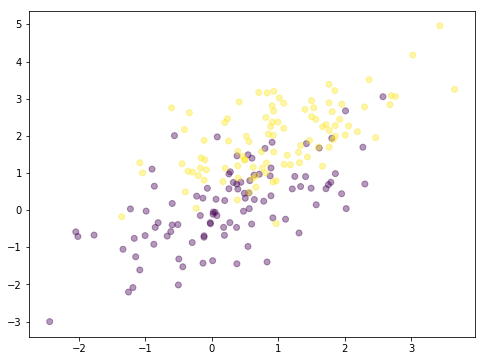

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(X2[:,0], X2[:,1],c=Y2,alpha=0.4)

**Exercice 10** : Créer 6 modèles de K-NN avec K=1,3,5,7,9,11 et entraîner les 6 modèles sur les données `(XX,yy)`. Mettre les 6 modèles dans un *liste* qui s'appelle `KNNs`.  

In [ ]:
# Réponse pour l'exercice 10

nom_neighbors=[1,3,5,7,9,11]

KNNs=[]

for i in range(len(nom_neighbors)):
    KNNs.append(#remplir avec votre code ici)




Une fois qu'on a construit les 6 modèles de K-NN, on va visualiser la frontière de décision pour K-NN avec les différentes valeurs de `K`.

In [ ]:
# Visualisation de la frontière de décision pour K=1,3,5,7,9,11


x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1), np.arange(y_min, y_max,0.1))

f, axarr = plt.subplots(2,3, sharex="col", sharey="row",figsize=(15,12))

for idx,clf,tt in zip(product([0,1,2],[0,1,2]),KNNs, ["KNN (k=%d)"%k for k in nom_neighbors]):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0],idx[1]].contourf(xx,yy,Z,alpha = 0.4)
    axarr[idx[0],idx[1]].scatter(X2[:,0],X2[:,1], c=Y2,s=20,edgecolor="k")
    axarr[idx[0],idx[1]].set_title(tt)
    
plt.show()


**Exercice 11** : Que constate-t-on sur les 6 images de  frontières de décision ?



Réponse pour l'exercice 11: 





